In [17]:
import pandas as pd
import numpy as np
import os
import glob

In [18]:
import tensorflow as tf
tf.__version__

'2.16.1'

In [24]:

def prepare():
    
    path = 'classification-of-defects-in-a-rotary-machine/train'
    csv_files = glob.glob(os.path.join(path, "*.csv")) 
    
    data = []
   
    for f in csv_files: 
                
            label = f.split('/')[2].split('.')[0][-1]
            df = pd.read_csv(f)
            
            a = np.array_split(df.iloc[:,1], 1000)
                
            for j in range(0,1000):
                    
                data.append(
                        
                    [np.array(a[j][:600], dtype=np.float64),
                    np.int32(label)]

                )
       
            
    df = pd.DataFrame(data, columns=['TS','label'])

    df = df.sample(frac = 1)

    return df
        
        
df = pd.DataFrame(prepare(), columns=['TS','label'])

df


,TS,label


In [20]:

#print(df.iloc[8030,:])

In [21]:
df

,TS,label


In [22]:
np.array(df['TS'].to_list())[:,tf.newaxis,:].shape

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
x = np.array(df['TS'].to_list())



In [ ]:
x[:,np.newaxis,:].shape

(28000, 1, 600)

In [ ]:
len(x[1000])

600

In [ ]:
x

array([[6.692, 6.701, 6.76 , ..., 6.607, 6.588, 6.578],
       [6.478, 6.453, 6.471, ..., 6.556, 6.602, 6.944],
       [6.538, 6.575, 6.526, ..., 6.539, 6.501, 6.538],
       ...,
       [6.41 , 6.397, 6.36 , ..., 6.334, 6.313, 6.348],
       [6.629, 6.484, 6.445, ..., 6.436, 6.505, 6.585],
       [6.41 , 6.426, 6.345, ..., 6.487, 6.5  , 6.547]])

In [ ]:
x[:,np.newaxis,:].shape

(28000, 1, 600)

In [ ]:
y = np.array(df['label'].to_list())

In [ ]:
from keras.utils import to_categorical

to_categorical(y,num_classes=5)

array([[0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]])

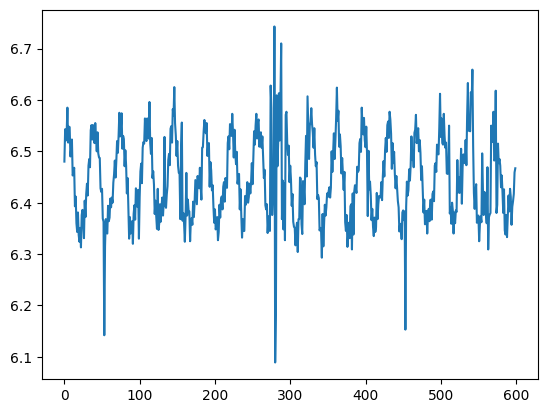

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x[100])
plt.show()
